# Diagonalization and Powers of A

## 1) Definition

A square matrix $A \in \mathbb{R}^{n \times n}$ is **diagonalizable** if there exists an invertible matrix $P$ and a diagonal matrix $D$ such that:

$$
A = P D P^{-1}
$$

- $D$ contains the eigenvalues of $A$ on its diagonal.
- Columns of $P$ are the corresponding eigenvectors of $A$.

**Powers of A:** If $A$ is diagonalizable:

$$
A^k = P D^k P^{-1}, \quad k \in \mathbb{Z}_{\ge 0}
$$

where $D^k$ is easy to compute by raising each diagonal entry to the power $k$.


## 2) Derivation

1. Let $A$ have eigenvalues $\lambda_1, \dots, \lambda_n$ and eigenvectors $\mathbf{v}_1, \dots, \mathbf{v}_n$.

2. Form matrix $P = [\mathbf{v}_1, \dots, \mathbf{v}_n]$ and $D = \text{diag}(\lambda_1, \dots, \lambda_n)$.

3. By definition of eigenvectors:
$$
A \mathbf{v}_i = \lambda_i \mathbf{v}_i \quad \Rightarrow \quad A P = P D
$$

4. Multiply both sides by $P^{-1}$:
$$
A = P D P^{-1}
$$

5. Powers of $A$:
$$
A^2 = (P D P^{-1})(P D P^{-1}) = P D^2 P^{-1}
$$
$$
A^k = P D^k P^{-1}
$$


## 3) Computation Steps (Example)

**Step 1:** Compute eigenvalues and eigenvectors of $A$:
$$
A \mathbf{v}_i = \lambda_i \mathbf{v}_i
$$

**Step 2:** Form $P = [\mathbf{v}_1, \dots, \mathbf{v}_n]$ and $D = \text{diag}(\lambda_1, \dots, \lambda_n)$.

**Step 3:** Verify diagonalization:
$$
A = P D P^{-1}
$$

**Step 4:** Compute powers of $A$:
$$
A^k = P D^k P^{-1}, \quad D^k = \text{diag}(\lambda_1^k, \dots, \lambda_n^k)
$$

**Step 5 (Optional):** Check by reconstructing $A^k$ using standard multiplication and compare.


In [1]:
import jax.numpy as jnp

# Example matrix
A = jnp.array([[4., 1.],
               [2., 3.]])

# Compute eigenvalues and eigenvectors
eigvals, eigvecs = jnp.linalg.eig(A)

# Diagonal matrix D
D = jnp.diag(eigvals)

# Matrix P (eigenvectors)
P = eigvecs

# Inverse of P
P_inv = jnp.linalg.inv(P)

# Verify diagonalization
A_reconstructed = P @ D @ P_inv

# Compute A^5 using diagonalization
D_power = jnp.diag(eigvals**5)
A_power_5 = P @ D_power @ P_inv

print("Matrix A:\n", A)
print("Eigenvalues:", eigvals)
print("Eigenvectors (columns of P):\n", P)
print("Reconstructed A from diagonalization:\n", A_reconstructed)
print("A^5 computed using diagonalization:\n", A_power_5)


Matrix A:
 [[4. 1.]
 [2. 3.]]
Eigenvalues: [5.       +0.j 1.9999999+0.j]
Eigenvectors (columns of P):
 [[ 0.70710677+0.j -0.4472136 +0.j]
 [ 0.70710677+0.j  0.89442724+0.j]]
Reconstructed A from diagonalization:
 [[4.       +0.j 1.       +0.j]
 [2.0000005+0.j 3.       +0.j]]
A^5 computed using diagonalization:
 [[2094.0005+0.j 1031.    +0.j]
 [2062.0005+0.j 1063.    +0.j]]


## 4) Plotting

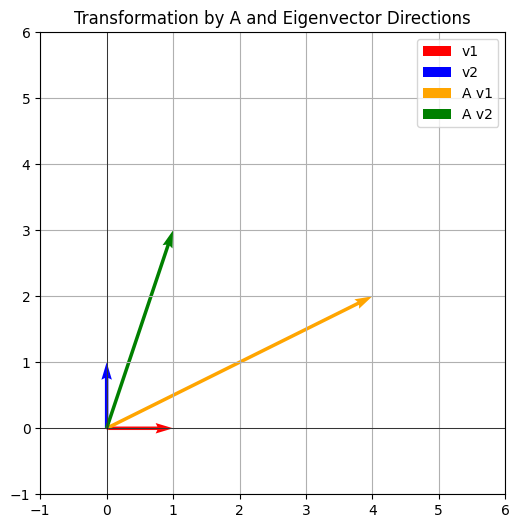

In [2]:
import matplotlib.pyplot as plt

# Original vectors (basis)
origin = jnp.zeros(2)
v1 = jnp.array([1., 0.])
v2 = jnp.array([0., 1.])

# Transformation by A
Av1 = A @ v1
Av2 = A @ v2

plt.figure(figsize=(6,6))
# Original vectors
plt.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(*origin, *v2, angles='xy', scale_units='xy', scale=1, color='b', label='v2')

# Transformed vectors
plt.quiver(*origin, *Av1, angles='xy', scale_units='xy', scale=1, color='orange', label='A v1')
plt.quiver(*origin, *Av2, angles='xy', scale_units='xy', scale=1, color='green', label='A v2')

plt.xlim(-1, 6)
plt.ylim(-1, 6)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Transformation by A and Eigenvector Directions")
plt.show()


## 5) Use Cases of Diagonalization and Powers of A

1. **Efficient Computation:** Compute large powers of matrices quickly using $A^k = P D^k P^{-1}$.
2. **Differential Equations:** Solve linear systems of ODEs using eigen-decomposition.
3. **Markov Chains:** Compute steady states and long-term behavior using matrix powers.
4. **Quantum Mechanics:** Diagonalization for observable operators simplifies computations.
5. **PCA & Data Science:** Covariance matrices are diagonalized to find principal components.
6. **Control Theory:** Analyze system dynamics and stability using eigenvalues.
